# Loading the dataset

import essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/Bilmis/AI-Powered-Demand-Forecasting/refs/heads/main/retail_store_inventory.csv"
df = pd.read_csv(url)
print(df.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

# Data Preprocessing

Data cleaning

In [4]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [5]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
print(df['Product ID'].unique())
print(df['Store ID'].unique())

['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']
['S001' 'S002' 'S003' 'S004' 'S005']


In [7]:
#store id isnt needed for the demand forecasting application
df.drop(columns=['Store ID','Date'],inplace=True,errors='ignore')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product ID          73100 non-null  object 
 1   Category            73100 non-null  object 
 2   Region              73100 non-null  object 
 3   Inventory Level     73100 non-null  int64  
 4   Units Sold          73100 non-null  int64  
 5   Units Ordered       73100 non-null  int64  
 6   Demand Forecast     73100 non-null  float64
 7   Price               73100 non-null  float64
 8   Discount            73100 non-null  int64  
 9   Weather Condition   73100 non-null  object 
 10  Holiday/Promotion   73100 non-null  int64  
 11  Competitor Pricing  73100 non-null  float64
 12  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 7.3+ MB
None


Encoding categorical variables

In [8]:
#identify the categorical variables
for cols in df.columns:
  if df[cols].nunique()<10:
      print(cols,df[cols].unique())
print('Product ID',df['Product ID'].unique())

Category ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Region ['North' 'South' 'West' 'East']
Discount [20 10  0  5 15]
Weather Condition ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Holiday/Promotion [0 1]
Seasonality ['Autumn' 'Summer' 'Winter' 'Spring']
Product ID ['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']


In [9]:
from sklearn.preprocessing import LabelEncoder

df_encoded=df.copy()

#applying one-hot encoding to nominal categories
one_hot_cols=[]
for cols in df.columns:
  if df[cols].nunique()<=20 and df[cols].nunique()>2:
      one_hot_cols.append(cols)
print(one_hot_cols)

df_encoded=pd.get_dummies(df_encoded,columns=one_hot_cols)
print(df_encoded.head())

['Product ID', 'Category', 'Region', 'Discount', 'Weather Condition', 'Seasonality']
   Inventory Level  Units Sold  Units Ordered  Demand Forecast  Price  \
0              231         127             55           135.47  33.50   
1              204         150             66           144.04  63.01   
2              102          65             51            74.02  27.99   
3              469          61            164            62.18  32.72   
4              166          14            135             9.26  73.64   

   Holiday/Promotion  Competitor Pricing  Product ID_P0001  Product ID_P0002  \
0                  0               29.69              True             False   
1                  0               66.16             False              True   
2                  1               31.32             False             False   
3                  1               34.74             False             False   
4                  0               68.95             False             False

Scaling

In [10]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)

['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Holiday/Promotion', 'Competitor Pricing']


In [11]:
from sklearn.preprocessing import MinMaxScaler
# Select only numeric columns for scaling
numeric_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Competitor Pricing']
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# NN Model creation and training

Dataset split

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp=train_test_split(df_encoded.drop(columns=['Demand Forecast']),df_encoded['Demand Forecast'],test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

print(x_train.shape,x_val.shape,x_test.shape)

(58480, 48) (7310, 48) (7310, 48)


Model definition

In [13]:
print(x_train.columns)

Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Price',
       'Holiday/Promotion', 'Competitor Pricing', 'Product ID_P0001',
       'Product ID_P0002', 'Product ID_P0003', 'Product ID_P0004',
       'Product ID_P0005', 'Product ID_P0006', 'Product ID_P0007',
       'Product ID_P0008', 'Product ID_P0009', 'Product ID_P0010',
       'Product ID_P0011', 'Product ID_P0012', 'Product ID_P0013',
       'Product ID_P0014', 'Product ID_P0015', 'Product ID_P0016',
       'Product ID_P0017', 'Product ID_P0018', 'Product ID_P0019',
       'Product ID_P0020', 'Category_Clothing', 'Category_Electronics',
       'Category_Furniture', 'Category_Groceries', 'Category_Toys',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Discount_0', 'Discount_5', 'Discount_10', 'Discount_15', 'Discount_20',
       'Weather Condition_Cloudy', 'Weather Condition_Rainy',
       'Weather Condition_Snowy', 'Weather Condition_Sunny',
       'Seasonality_Autumn', 'Seasonality_Spring',

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential([
    Dense(128,activation='relu',input_dim=x_train.shape[1]),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])

print(model.summary())
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

# Create model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse',metrics=['mae']) #mean absolute error as metric

#train the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=32,verbose=1)#alidation data used after each epoch to evaluate performance and help tune the model.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10292.7393 - mae: 69.3338 - val_loss: 88.4100 - val_mae: 7.9305
Epoch 2/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 87.7014 - mae: 7.9078 - val_loss: 83.9317 - val_mae: 7.7751
Epoch 3/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 84.3390 - mae: 7.8219 - val_loss: 80.1050 - val_mae: 7.6457
Epoch 4/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 82.8177 - mae: 7.7516 - val_loss: 81.3503 - val_mae: 7.6906
Epoch 5/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 81.7091 - mae: 7.7051 - val_loss: 80.9156 - val_mae: 7.6734
Epoch 6/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 83.0363 - mae: 7.7544 - val_loss: 79.1040 - val_mae: 7.6051
Epoch 7/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 81.1195 - mae: 7.6772 - val_loss: 81.7416 - val_mae: 7.7038
Epoch 8/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 81.1023 - mae: 7.6753 - val_loss: 79.7915 - val_mae: 7.6434
Epoch 9/50
1828

# Model Evaluation

In [15]:
test_loss = model.evaluate(x_test, y_test)
print(  f'Test Loss: {test_loss[0]:.4f}')
print(  f'Test MAE: {test_loss[1]:.4f}')

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.9843 - mae: 8.1033
Test Loss: 94.0054
Test MAE: 8.1440


# Saving the model

In [16]:
model.save("demand_forecasting_model.keras")
#model.save("demand_forecasting_model.h5")


In [ ]:
# Save this to use during inference
ohe_columns = df_encoded.columns.tolist()
from sklearn.preprocessing import OneHotEncoder
import pickle

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = ohe.fit_transform(df[one_hot_cols])

# Save encoder
with open('ohe_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)
#save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
feature_columns = list(x_train.columns) # o)r X.columns if using a DataFrame

import pickle
with open("feature_columns.pkl", "wb") as f:
  pickle.dump(feature_columns, f)
print(feature_columns)


['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Holiday/Promotion', 'Competitor Pricing', 'Product ID_P0001', 'Product ID_P0002', 'Product ID_P0003', 'Product ID_P0004', 'Product ID_P0005', 'Product ID_P0006', 'Product ID_P0007', 'Product ID_P0008', 'Product ID_P0009', 'Product ID_P0010', 'Product ID_P0011', 'Product ID_P0012', 'Product ID_P0013', 'Product ID_P0014', 'Product ID_P0015', 'Product ID_P0016', 'Product ID_P0017', 'Product ID_P0018', 'Product ID_P0019', 'Product ID_P0020', 'Category_Clothing', 'Category_Electronics', 'Category_Furniture', 'Category_Groceries', 'Category_Toys', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Discount_0', 'Discount_5', 'Discount_10', 'Discount_15', 'Discount_20', 'Weather Condition_Cloudy', 'Weather Condition_Rainy', 'Weather Condition_Snowy', 'Weather Condition_Sunny', 'Seasonality_Autumn', 'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter']


# Prediction

In [ ]:
predictions = model.predict(x_test)

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


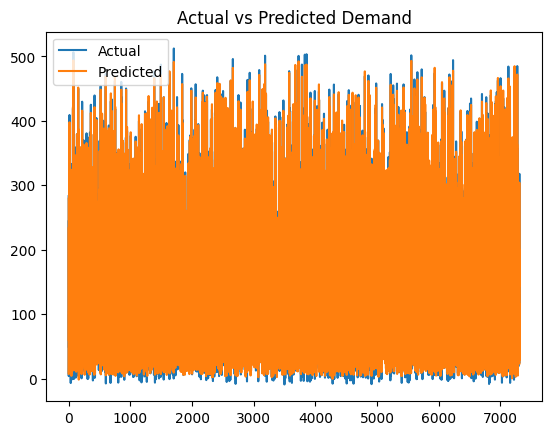

In [ ]:
plt.plot(y_test.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Demand")
plt.show()


END!!